In [3]:
#Luis Claudio 
import numpy as np

def LUdecomp(A):
    LU = np.copy(A)
    n  = len(A)
    for j in range(n-1):
        for i in range(j+1,n):
            LU[i][j] = LU[i][j]/LU[j][j]
            for k in range(j+1,n):
                LU[i][k] = LU[i][k] - LU[i][j]*LU[j][k]
    return LU

def LUforwardsub (L,b):
    n = len(L)
    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1,n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - L[i][j]*y[j]
    return y
            
def LUbackwardsub (U,y):
    n = len(U)
    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] /= U[i][i]
    return x
    
def LUsolve(LU,b):
    y = LUforwardsub(LU,b)
    x = LUbackwardsub(LU,y)
    return x
  
def LUgetL(LU):
    L  = np.copy(LU)
    n  = len(LU)
    for i in range(0,n):
        L[i,i] = 1.0
        for j in range(i+1,n):
            L[i][j] = 0.0
    return L
    
def LUgetU(LU):
    U  = np.copy(LU)
    n  = len(LU)
    for i in range(1,n):
        for j in range(0,i):
            U[i][j] = 0.0
    return U
    
def LUinverse(LU):
    n = len(LU)
    e = np.zeros(n)
    I = np.zeros((n,n))
    for j in range(n):
        e[j] = 1.0
        x = LUsolve(LU,e)
        for i in range(n):
            I[i][j] = x[i]
        e[j] = 0.0
    return I

def LUdet(LU):
    n = len(LU)
    det = 1.0
    for i in range(n):
        det = det * LU[i][i]
    return det

A = np.matrix([[1.0,-1.0,1.0,-1.0],[1.0,0.0,0.0,0.0],[1.0,1.0,1.0,1.0],[1.0,2.0,4.0,8.0]])
LU = LUdecomp(A)
print(LU)
b = np.array([0.0,0.0,0.0,6.0])
print(b)
x = LUsolve(LU,b)
print(x)

L = LUgetL(LU)
print(L)
U = LUgetU(LU)
print(U)
print(np.dot(L,U))

print(np.dot(A,x))

print(LUdet(LU))
print(np.linalg.det(A))

IA = LUinverse(LU)
print(IA)
print(np.dot(A,IA))


[[ 1. -1.  1. -1.]
 [ 1.  1. -1.  1.]
 [ 1.  2.  2.  0.]
 [ 1.  3.  3.  6.]]
[ 0.  0.  0.  6.]
[ 0. -1.  0.  1.]
[[ 1.  0.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 1.  2.  1.  0.]
 [ 1.  3.  3.  1.]]
[[ 1. -1.  1. -1.]
 [ 0.  1. -1.  1.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  0.  6.]]
[[ 1. -1.  1. -1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]]
[[ 0.  0.  0.  6.]]
12.0
12.0
[[ -2.77555756e-17   1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -3.33333333e-01  -5.00000000e-01   1.00000000e+00  -1.66666667e-01]
 [  5.00000000e-01  -1.00000000e+00   5.00000000e-01   0.00000000e+00]
 [ -1.66666667e-01   5.00000000e-01  -5.00000000e-01   1.66666667e-01]]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.77555756e-17   1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


[[   1.    1.    1.    1.    1.]
 [   1.    2.    4.    8.   16.]
 [   1.    3.    9.   27.   81.]
 [   1.    4.   16.   64.  256.]
 [   1.    5.   25.  125.  625.]]
[ -73.          146.25        -91.04166667   22.75         -1.95833333]
2.01948391737e-26


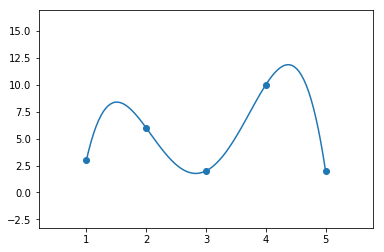

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def evalp(x,c):
    d = len(c)-1
    p = c[0]
    xp = 1.0
    for i in range(d):
        xp *= x
        p += c[i+1]*xp
    return p

def buildVmatrix(x):
    d = len(x)-1
    V = np.zeros((len(x),d+1))
    for i in range(len(x)):
        for j in range(d+1):
            V[i][j] = x[i]**j
    return V

def PolynomialInterpolation(x,y):
    V = buildVmatrix(x)
    c = np.linalg.solve(V,np.array(y))
    return c

def drawPolynomial(x,y,c,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
d = 4

A = buildVmatrix(x)
print(A)

c = PolynomialInterpolation(x,y)
print(c)

erro = np.linalg.norm(A.dot(c)-y)**2
print(erro)


drawPolynomial(x,y,c,100,min(x),max(x))

In [3]:
def LUdecompP(A):
    LU = np.copy(A)
    n  = len(A)
    sinal = 1.
    p = range(n)
    for j in range(n-1):
        maior = j
        t = abs(LU[j][j])
        for i in range(j+1,n):
            s = abs(LU[i][j])
            if s > t:
                t = s
                maior = i
        if j != maior:
            sinal *= -1
            itmp = p[j]
            p[j] = p[maior]
            p[maior] = itmp
            for k in range(n):
                dtmp = LU[maior][k]
                LU[maior][k] = LU[j][k]
                LU[j][k] = dtmp
        for i in range(j+1,n):        
            LU[i][j] = LU[i][j]/LU[j][j]
            for k in range(j+1,n):
                LU[i][k] = LU[i][k] - LU[i][j]*LU[j][k]
    return LU, p, sinal

In [4]:
Ap = np.matrix([[1.0,-1.0,1.0,-1.0],[1.0,0.0,0.0,0.0],[1.0,1.0,1.0,1.0],[1.0,2.0,4.0,8.0]])


LUp, p, sinal =  LUdecompP(Ap)
print Ap

[[ 1. -1.  1. -1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]]


In [44]:
def LUforwardsubP (L,b, p):
    n = len(L)
    y = np.zeros(n)
    y[0] = b[p[0]]
    for i in range(1,n):
        y[i] = b[p[i]]
        for j in range(i):
            y[i] = y[i] - L[i][j]*y[j]
    return y
def LUdetp(LU, sinal):
    n = len(LU)
    det = 1.0
    for i in range(n):
        det = det * LU[i][i]
    return det*sinal

In [35]:
print LUp
print
print p
print
LUforwardsubP(LUgetL(LUp), b, p)

[[ 1.         -1.          1.         -1.        ]
 [ 1.          3.          3.          9.        ]
 [ 1.          0.66666667 -2.         -4.        ]
 [ 1.          0.33333333  1.          2.        ]]

[0, 3, 2, 1]



array([ 0.,  6., -4.,  2.])

In [40]:
Lp =LUgetL(LUp)

In [41]:
Up = LUgetU(LUp)

In [42]:
np.dot(Lp,Up)

array([[ 1., -1.,  1., -1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  0.]])

In [46]:
LUdetp(LUp,sinal)

12.0